# Statistics of the Dutch Governmental Institution Dataset

This notebook provides the code to extract the statistics of the annotated and translated English dataset.

The code can also be used for extracting statistics about the splitted data (train, validation, test).

*Note: the output of some of the cells is hidden because the data is not allowed to be shared.*

In [3]:
# Import the required libraries
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.util import ngrams
from nltk.corpus import stopwords
from collections import Counter, defaultdict
import string
import matplotlib.pyplot as plt

#### Inspecting Text Statistics

The following code can be used to extract statistical information about the text data in the full dataset or using the split datasets. This includes the minimum, maximum and mean token/sentence length, the total number of tokens, 20 most frequent n-grams, 20 most frequent n-grams without stopwords and punctuation marks.

In [ ]:
def extract_text_stats(input_file):
    """
    Extracts and prints statistics about token and sentence lengths, total number of tokens,
    and the 20 most frequent n-grams with and without stopwords and punctuation for texts in a given dataset.
    Args:
    - input_file: Path to the dataset file.
    """
    df = pd.read_csv(input_file, delimiter=';', header=0)
    text_column = df.iloc[:, 1]
    nltk.download('punkt')
    nltk.download('stopwords')

    all_tokens = []
    clean_tokens = []
    token_counts = []
    sentence_counts = []
    stop_words = set(stopwords.words('english'))
    punctuation = set(string.punctuation)

    # Tokenizing and cleaning
    for text in text_column:
        sentences = sent_tokenize(str(text))
        sentence_counts.append(len(sentences))

        tokens = word_tokenize(str(text))
        all_tokens.extend(tokens)
        token_counts.append(len(tokens))

        clean_tokens.extend([token.lower() for token in tokens if token.lower() not in stop_words and token not in punctuation])

    # Calculating statistics
    total_tokens = len(all_tokens)
    total_unique_tokens = len(set(all_tokens))
    mean_tokens_per_text = sum(token_counts) / len(token_counts) if token_counts else 0
    mean_sentences_per_text = sum(sentence_counts) / len(sentence_counts) if sentence_counts else 0

    # Generating n-grams
    all_bigrams = Counter(ngrams(all_tokens, 2))
    clean_bigrams = Counter(ngrams(clean_tokens, 2))

    # Extracting top 20 n-grams
    top_20_all_bigrams = all_bigrams.most_common(20)
    top_20_clean_bigrams = clean_bigrams.most_common(20)

    # Printing out the statistics
    print(f'Total number of tokens: {total_tokens}')
    print(f'Total unique tokens: {total_unique_tokens}')
    print(f'Average number of tokens per text: {mean_tokens_per_text:.2f}')
    print(f'Average number of sentences per text: {mean_sentences_per_text:.2f}')
    print('Top 20 most frequent n-grams:')
    for bigram, freq in top_20_all_bigrams:
        print(f"{bigram}: {freq}")
    print('\nTop 20 most frequent n-grams without stopwords and punctuation:')
    for bigram, freq in top_20_clean_bigrams:
        print(f"{bigram}: {freq}")

extract_text_stats('../data/full_dataset.csv')

#### Inspecting and Visualizing Label Distribution

The code below can be used for examining the number of main topic and subtopic labels in a given dataset (full/train/validation/test) and plot the distributions.

In [ ]:
def extract_label_stats(input_file):
    """
    Extracts and prints statistics about the distribution of main and subtopics from labels in a given dataset.
    This includes total feedback instances, label counts, average occurrences, underrepresented topics, and plots the distribution of both main and subtopics.
    Args:
    - input_file: Path to the dataset file.
    """
    maintopics = ['Making contact with employee', 'Processes', 'Digital possibilities', 'General experience', 'Information provision', 'Employee attitude & behavior', 'Handling', 'No topic found', 'Knowledge & skills of employee', 'Price & quality', 'Physical service provision']
    subtopics = ['Waiting time', 'Speaking to the right person', 'Correctness of handling', 'Functionalities web & app', 'Ease of process', 'Reception & Registration', 'Friendliness', 'Quality of information', 'Information provision web & app', 'Clarity of information', 'Solution oriented', 'Availability of employee', 'Price & costs', 'Speed of processing', 'Professionalism', 'Opening hours & accessibility', 'Ease of use web & app', 'Keeping up to date', 'Integrity & fulfilling responsibilities', 'Payout & return', 'No subtopic found', 'Quality of customer service', 'Facilities', 'Objection & evidence', 'General experience subtopic', 'Efficiency of process', 'Genuine interest', 'Expertise', 'Helpfulness', 'Personal approach', 'Communication']
    
    maintopics_counts = {maintopic: 0 for maintopic in maintopics}
    subtopics_counts = {subtopic: 0 for subtopic in subtopics}
    num_labels = 0

    df = pd.read_csv(input_file, delimiter=';', header=0)
    total_rows = len(df)
    for index, row in df.iterrows():
        # Ierating through the rows to get labels out for each instance
        for i, label in enumerate(row[2:], start=2):
            column_name = df.columns[i]            
            if column_name in maintopics_counts:
                maintopics_counts[column_name] += int(label)
                num_labels += int(label)
            elif column_name in subtopics_counts:
                subtopics_counts[column_name] += int(label)
                num_labels += int(label)

    # Calculate average occurrences
    average_main = sum(maintopics_counts.values()) / len(maintopics)
    average_sub = sum(subtopics_counts.values()) / len(subtopics)

     # Identify underrepresented topics
    underrepresented_main = {k: v for k, v in maintopics_counts.items() if v < average_main}
    underrepresented_sub = {k: v for k, v in subtopics_counts.items() if v < average_sub}

    print(f'Total number of feedback instances in the data: {total_rows}')
    print(f'Total number of labels in the dataset: {num_labels}\n')

    print(f"Average occurrence for main topics: {average_main:.2f}")
    print(f"Average occurrence for subtopics: {average_sub:.2f}")
    print("\nUnderrepresented Main Topics:")
    for topic in underrepresented_main.items():
        print(topic)

    print("\nUnderrepresented Subtopics:")
    for topic in underrepresented_sub.items():
        print(topic)

    print('\nMain Topic Frequency:')
    for main_topic, freq in maintopics_counts.items():
        print(f'{main_topic}: {freq}')

    print('\nSubtopic Frequency')
    for subtopic, freq in subtopics_counts.items():
        print(f'{subtopic}: {freq}')
    
    # Visualize main topic distribution
    sorted_maintopic_counts = {k: v for k, v in sorted(maintopics_counts.items(), key=lambda item: item[1], reverse=False)}
    plt.rcParams.update({'font.size': 10, 'axes.labelsize': 12, 'axes.titlesize': 8, 'xtick.labelsize': 12,'ytick.labelsize': 12 })
    plt.figure(figsize=(10, 6))
    plt.barh(list(sorted_maintopic_counts.keys()), sorted_maintopic_counts.values(), color='forestgreen')
    plt.title('Distribution of Main Topics')
    plt.xlabel('Frequency')
    plt.ylabel('Main Topic')
    plt.tight_layout()
    plt.show()

    # Visualize subtopic distribution
    sorted_subtopic_counts = {k: v for k, v in sorted(subtopics_counts.items(), key=lambda item: item[1], reverse=False)}
    plt.rcParams.update({'font.size': 10, 'axes.labelsize': 12, 'axes.titlesize': 8, 'xtick.labelsize': 12,'ytick.labelsize': 12 })
    plt.figure(figsize=(10, 12))
    plt.barh(list(sorted_subtopic_counts.keys()), sorted_subtopic_counts.values(), color='cornflowerblue')
    plt.title('Distribution of Subtopics')
    plt.xlabel('Frequency')
    plt.ylabel('Subtopic')
    plt.tight_layout()
    plt.show()

extract_label_stats('../data/train.csv')
        

#### Inspecting the number of labels across instances.

The code below can be used to extract information about the average number of labels per instance, and analyzing the distribution of main and subtopic labels across instances to provide insights into label frequency per instance.

In [25]:
def measure_multilabeledness(input_file):
    """
    Calculates and prints the distribution of label counts per instance and the average number of topic labels per instance in a dataset.
    Args:
    - input_file: Path to the dataset file.
    """
    maintopics = ['Making contact with employee', 'Processes', 'Digital possibilities', 'General experience', 'Information provision', 'Employee attitude & behavior', 'Handling', 'No topic found', 'Knowledge & skills of employee', 'Price & quality', 'Physical service provision']
    subtopics = ['Waiting time', 'Speaking to the right person', 'Correctness of handling', 'Functionalities web & app', 'Ease of process', 'Reception & Registration', 'Friendliness', 'Quality of information', 'Information provision web & app', 'Clarity of information', 'Solution oriented', 'Availability of employee', 'Price & costs', 'Speed of processing', 'Professionalism', 'Opening hours & accessibility', 'Ease of use web & app', 'Keeping up to date', 'Integrity & fulfilling responsibilities', 'Payout & return', 'No subtopic found', 'Quality of customer service', 'Facilities', 'Objection & evidence', 'General experience subtopic', 'Efficiency of process', 'Genuine interest', 'Expertise', 'Helpfulness', 'Personal approach', 'Communication']
    
    df = pd.read_csv(input_file, delimiter=';', header=0)
    total_labels = 0
    label_distribution = {}

    for index, row in df.iterrows():
        # Calculate the total number of labels for the row
        label_count = sum(int(row[topic]) for topic in maintopics + subtopics if topic in df.columns)
        total_labels += label_count

        # Initialize the label count in the dictionary if it does not exist
        if label_count not in label_distribution:
            label_distribution[label_count] = 0
        label_distribution[label_count] += 1

    average_topic_count_per_instance = total_labels / len(df)

    for labels, instances in sorted(label_distribution.items()):
        print(f'{instances} instances contain {labels} labels')

    print(f'\nAverage topic labels per instance: {average_topic_count_per_instance:.2f}')

measure_multilabeledness('../data/full_dataset.csv')

12746 instances contain 2 labels
1476 instances contain 3 labels
3593 instances contain 4 labels
1059 instances contain 5 labels
655 instances contain 6 labels

Average topic labels per instance: 2.74


#### Plot distribution in the splitted data (train-validation-test)

The code below can be used to plot and compare the distribution of main and subtopic labels across the full, training, validation and test datasets.

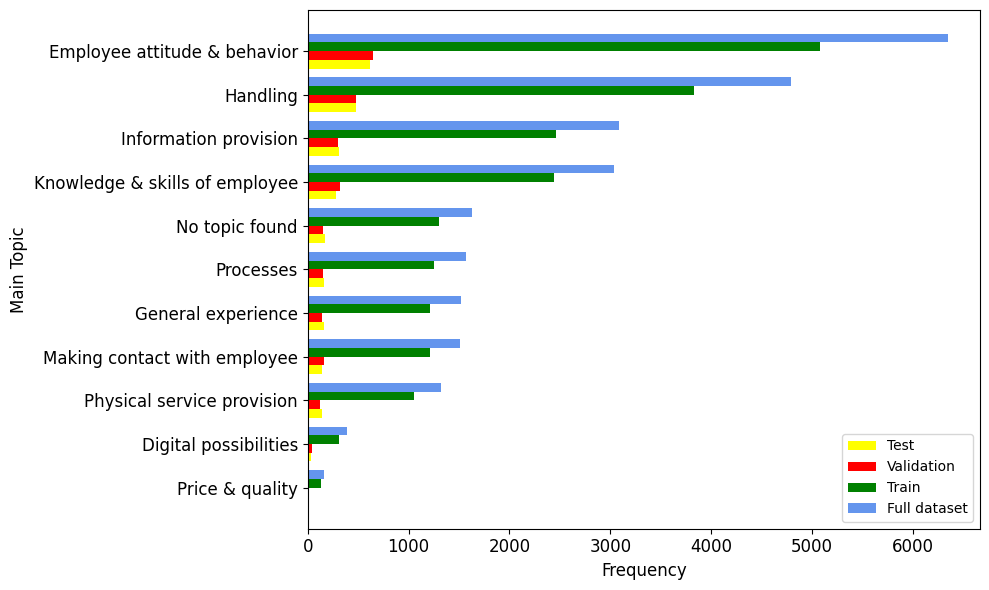

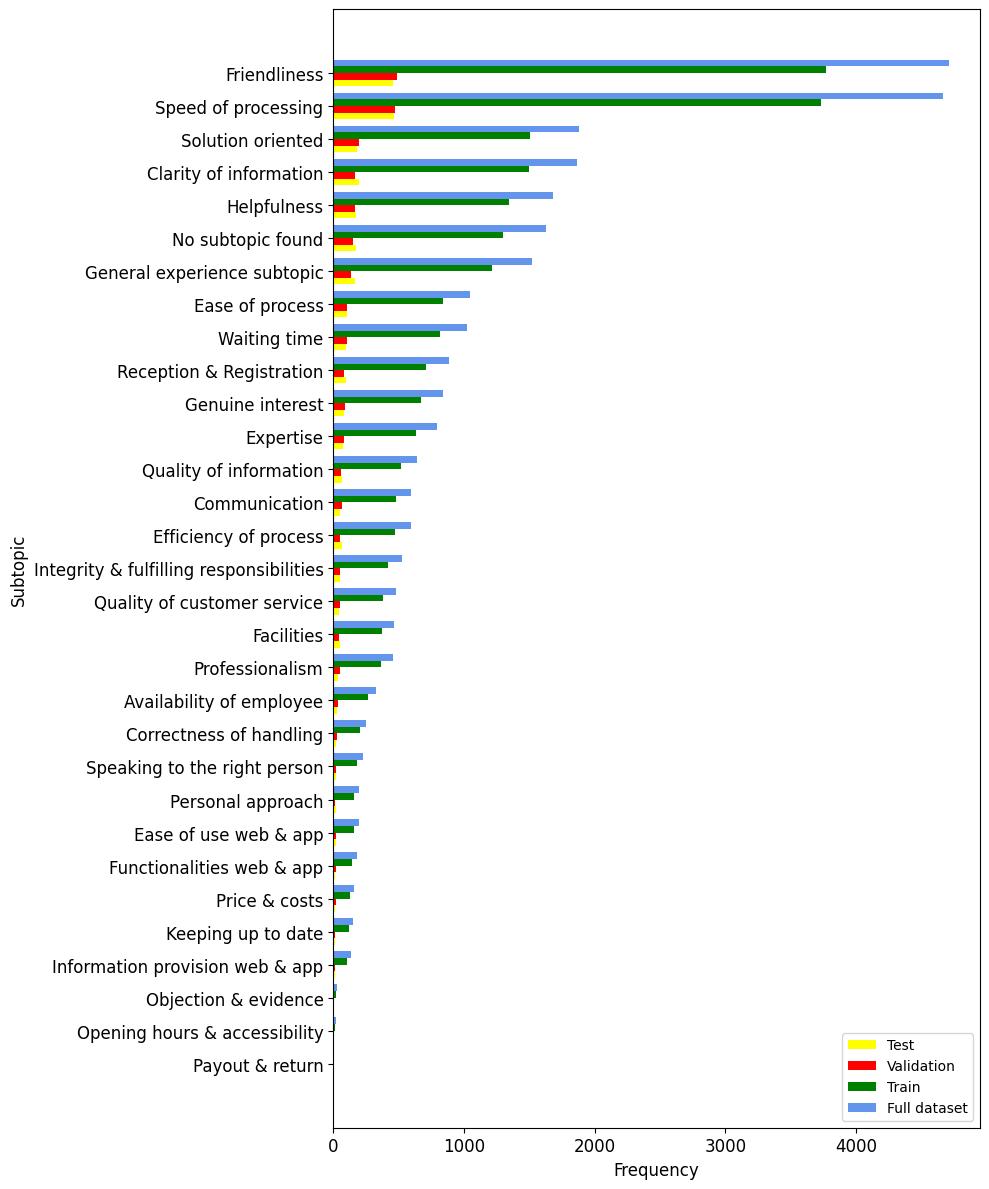

In [29]:
def compare_label_distributions(datasets_map):
    """
    Compares and visualizes the distribution of main and subtopics across full, train, validation, and test splits.    
    Args:
    - datasets_map: A list of tuples, where each tuple contains the filename of the dataset and its descriptive name.
    """
    maintopics = ['Making contact with employee', 'Processes', 'Digital possibilities', 'General experience', 'Information provision', 'Employee attitude & behavior', 'Handling', 'No topic found', 'Knowledge & skills of employee', 'Price & quality', 'Physical service provision']
    subtopics = ['Waiting time', 'Speaking to the right person', 'Correctness of handling', 'Functionalities web & app', 'Ease of process', 'Reception & Registration', 'Friendliness', 'Quality of information', 'Information provision web & app', 'Clarity of information', 'Solution oriented', 'Availability of employee', 'Price & costs', 'Speed of processing', 'Professionalism', 'Opening hours & accessibility', 'Ease of use web & app', 'Keeping up to date', 'Integrity & fulfilling responsibilities', 'Payout & return', 'No subtopic found', 'Quality of customer service', 'Facilities', 'Objection & evidence', 'General experience subtopic', 'Efficiency of process', 'Genuine interest', 'Expertise', 'Helpfulness', 'Personal approach', 'Communication']
    dataset_maintopic_counts = {'Full dataset': defaultdict(int), 'Train': defaultdict(int), 'Validation': defaultdict(int), 'Test': defaultdict(int)}
    dataset_subtopic_counts = {'Full dataset': defaultdict(int), 'Train': defaultdict(int), 'Validation': defaultdict(int), 'Test': defaultdict(int)}

    # Function to process a TSV file and update counts for the given dataset name
    def process_tsv(file_path, dataset_name):
        df = pd.read_csv(file_path, delimiter=';', header=0)
        for index, row in df.iterrows():
            for maintopic in maintopics:
                if maintopic in df.columns:
                    dataset_maintopic_counts[dataset_name][maintopic] += int(row[maintopic])
            for subtopic in subtopics:
                if subtopic in df.columns:
                    dataset_subtopic_counts[dataset_name][subtopic] += int(row[subtopic])

    # Process each file and update counts
    for file_name, dataset_name in datasets_map:
        process_tsv(file_name, dataset_name)

    # Sort main topics based on their frequencies in the full dataset
    sorted_main_topics = sorted(dataset_maintopic_counts['Full dataset'], key=dataset_maintopic_counts['Full dataset'].get, reverse=False)

    # Set the figure size and bar width
    plt.rcParams.update({'font.size': 10, 'axes.labelsize': 12, 'axes.titlesize': 8, 'xtick.labelsize': 12,'ytick.labelsize': 12})
    fig, ax = plt.subplots(figsize=(10, 6))
    bar_width = 0.2
    colors = ['cornflowerblue', 'green', 'red', 'yellow']

    # Ensure the order of the datasets in the plot as specified
    dataset_order = ['Full dataset', 'Train', 'Validation', 'Test']

    # Create the bar plot
    for i, dataset_name in reversed(list(enumerate(dataset_order))):
        counts = [dataset_maintopic_counts[dataset_name][topic] for topic in sorted_main_topics]
        positions = [x + (len(dataset_order) - 1 - i) * bar_width for x in range(len(sorted_main_topics))]
        ax.barh(positions, counts, bar_width, color=colors[i], label=dataset_name)

    # Set the y-axis to display the main topics sorted by frequency
    ax.set(yticks=[x + 1.5 * bar_width for x in range(len(sorted_main_topics))], yticklabels=sorted_main_topics)
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Main Topic')
    ax.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

    # Sort main topics based on their frequencies in the full dataset
    sorted_subtopics = sorted(dataset_subtopic_counts['Full dataset'], key=dataset_subtopic_counts['Full dataset'].get, reverse=False)

    # Set the figure size and bar width
    plt.rcParams.update({'font.size': 10, 'axes.labelsize': 12, 'axes.titlesize': 8, 'xtick.labelsize': 12,'ytick.labelsize': 12 })
    fig, ax = plt.subplots(figsize=(10, 12))
    bar_width = 0.2
    colors = ['cornflowerblue', 'green', 'red', 'yellow']  

    # Ensure the order of the datasets in the plot as specified
    dataset_order = ['Full dataset', 'Train', 'Validation', 'Test']

    # Create the bar plot
    for i, dataset_name in reversed(list(enumerate(dataset_order))):
        counts = [dataset_subtopic_counts[dataset_name][topic] for topic in sorted_subtopics]
        positions = [x + (len(dataset_order) - 1 - i) * bar_width for x in range(len(sorted_subtopics))]
        ax.barh(positions, counts, bar_width, color=colors[i], label=dataset_name)

    # Set the y-axis to display the main topics sorted by frequency
    ax.set(yticks=[x + 1.5 * bar_width for x in range(len(sorted_subtopics))], yticklabels=sorted_subtopics)
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Subtopic')
    ax.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

datasets_map = [
    ('../data/full_dataset.csv', 'Full dataset'),
    ('../data/train.csv', 'Train'),
    ('../data/validation.csv', 'Validation'),
    ('../data/test.csv', 'Test')
]
compare_label_distributions(datasets_map)

End of the notebook.
